In [1]:
# SKlearn实现葡萄牙银行机构营销案例
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入数据集，这里需要注意分隔符为分号“;”
bankSet = pd.read_csv('../data/bank-full.csv', sep=';')
bankSet.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
print(bankSet.shape)
bankSet.info()

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bankSet.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
bankSet.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


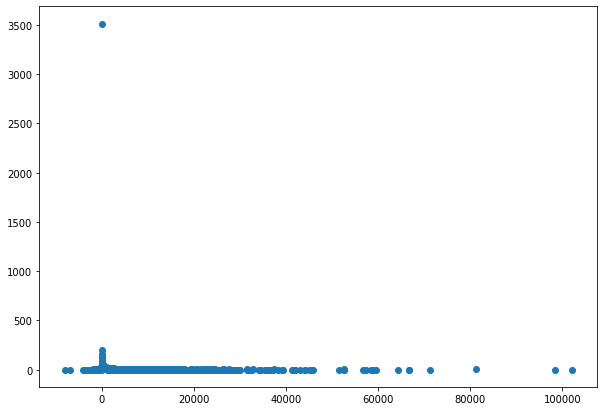

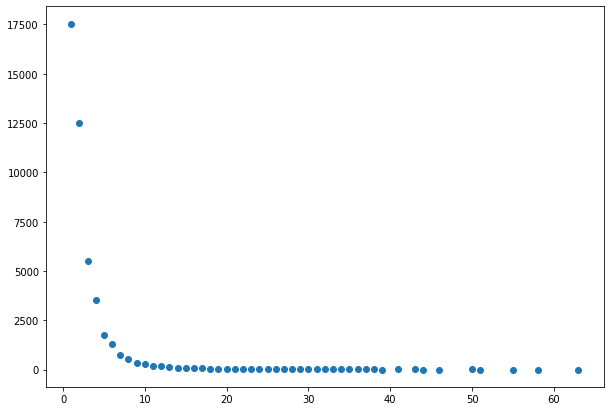

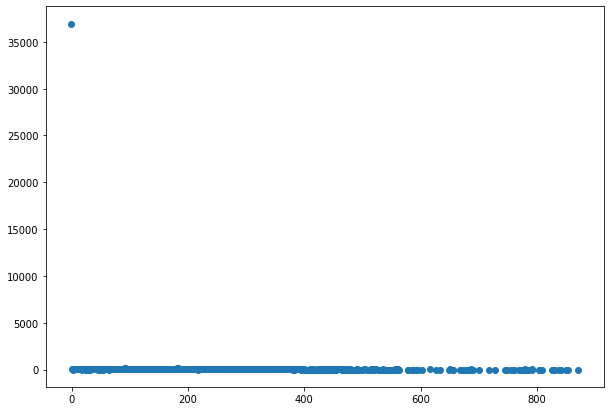

In [5]:
# bankSet['age'].value_counts()
x = list(bankSet['balance'].value_counts().index)
y = list(bankSet['balance'].value_counts())
# bankSet['balance'].value_counts().index
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.show()

x = list(bankSet['campaign'].value_counts().index)
y = list(bankSet['campaign'].value_counts())
# bankSet['balance'].value_counts().index
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.show()

x = list(bankSet['pdays'].value_counts().index)
y = list(bankSet['pdays'].value_counts())
# bankSet['balance'].value_counts().index
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.show()

In [6]:
#将连续型变量分箱编码为分类变量
from sklearn.preprocessing import KBinsDiscretizer

In [7]:
#将age/duration/day字段编码为三分类变量
est1 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
X1=bankSet.loc[:,['age','duration','day']]
X1.head()
est1.fit_transform(X1)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [2., 2., 1.],
       [1., 1., 1.],
       [0., 1., 1.]])

In [8]:
bankSet.loc[:,['age','duration','day']]=est1.fit_transform(X1)
bankSet.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,management,married,tertiary,no,2143,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
1,1.0,technician,single,secondary,no,29,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
2,0.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,0.0,may,0.0,1,-1,0,unknown,no
3,1.0,blue-collar,married,unknown,no,1506,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
4,0.0,unknown,single,unknown,no,1,no,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
5,0.0,management,married,tertiary,no,231,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
6,0.0,management,single,tertiary,no,447,yes,yes,unknown,0.0,may,0.0,1,-1,0,unknown,no
7,0.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,0.0,may,1.0,1,-1,0,unknown,no
8,1.0,retired,married,primary,no,121,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
9,1.0,technician,single,secondary,no,593,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no


In [9]:
#将balance/campaign/pdays/previous字段编码为二分类变量
est2 = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
X2=bankSet.loc[:,['balance','campaign','pdays','previous']]
bankSet.loc[:,['balance','campaign','pdays','previous']]=est2.fit_transform(X2)

In [10]:
bankSet.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,management,married,tertiary,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
1,1.0,technician,single,secondary,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
2,0.0,entrepreneur,married,secondary,no,0.0,yes,yes,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
3,1.0,blue-collar,married,unknown,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
4,0.0,unknown,single,unknown,no,0.0,no,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no


In [16]:
# bankSet['job'].value_counts()
# bankSet['marital'].value_counts()
bankSet['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [17]:
#将分类特征转换为分类数值
from sklearn.preprocessing import OrdinalEncoder
bankSet.iloc[:,:] = OrdinalEncoder().fit_transform(bankSet)
bankSet.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
2,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
3,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0.0,11.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
5,0.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
6,0.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
7,0.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,8.0,1.0,0.0,0.0,0.0,3.0,0.0
8,1.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
9,1.0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bankSet.iloc[:,:-1]
                                                 ,bankSet.iloc[:,-1]
                                                 ,test_size=0.25
                                                 ,random_state=42
                                                )
print(x_train.shape)
print(x_test.shape)

(33908, 16)
(11303, 16)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# classifier = LogisticRegression(random_state = 42, solver='saga')
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.8872865610899762


In [25]:
# 各分类算法建模
dataset = pd.read_csv('../data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
print(dataset.shape)
dataset.info

(400, 5)


<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

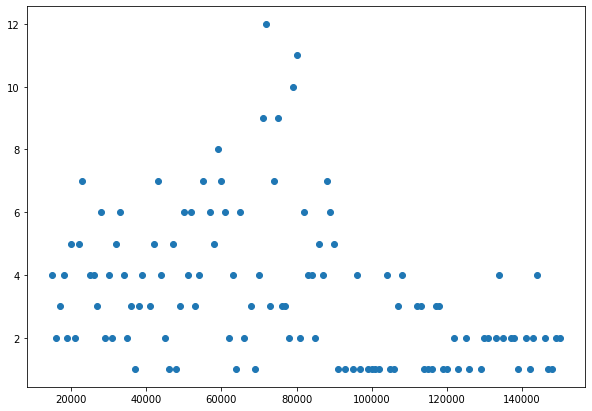

In [28]:
# bankSet['age'].value_counts()
x = list(dataset['EstimatedSalary'].value_counts().index)
y = list(dataset['EstimatedSalary'].value_counts())
# bankSet['balance'].value_counts().index
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.show()

In [29]:
#这里只需要处理性别这一个特征，所以用LabelEncoder，因为它允许输入一维数据
from sklearn.preprocessing import LabelEncoder
dataset.loc[:,'Gender']=LabelEncoder().fit_transform(dataset.loc[:,'Gender'])
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [30]:
#提取出特征矩阵和标签
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

#数据标准化（StandardScaler作用：针对每一个特征维度去均值和方差归一化）
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x[:10])
x = sc.fit_transform(x)
print(x[:10])

[[     1     19  19000]
 [     1     35  20000]
 [     0     26  43000]
 [     0     27  57000]
 [     1     19  76000]
 [     1     27  58000]
 [     0     27  84000]
 [     0     32 150000]
 [     1     25  33000]
 [     0     35  65000]]
[[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 [-0.98019606 -1.01769239 -0.37418169]
 [ 1.02020406 -1.78179743  0.18375059]
 [ 1.02020406 -1.01769239 -0.34481683]
 [-0.98019606 -1.01769239  0.41866944]
 [-0.98019606 -0.54012675  2.35674998]
 [ 1.02020406 -1.20871865 -1.07893824]
 [-0.98019606 -0.25358736 -0.13926283]]


In [31]:
#切分训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y
                                                 ,test_size=0.25
                                                 ,random_state=0
                                                )

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
def LR(x_train, y_train):
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    # y_pred = logreg.predict(x_test)
    # acc_log = round(logreg.score(x_train, y_train) * 100, 2)
    return logreg

In [65]:
def KNN(x_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    # y_pred = knn.predict(x_test)
    # acc_knn = round(knn.score(x_train, y_train) * 100, 2)
    # acc_knn
    return knn

In [66]:
def NB(x_train, y_train):
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    return nb

In [67]:
def DT(x_train, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    return dt

In [68]:
def RF(x_train, y_train, n=100):
    random_forest = RandomForestClassifier(n_estimators=n)
    random_forest.fit(x_train, y_train)
    return random_forest 

In [69]:
LR = LR(x_train, y_train)
# acc_LR = round(LR.score(x_train, y_train) * 100, 3)
KNN = KNN(x_train, y_train)
NB = NB(x_train, y_train)
DT = DT(x_train, y_train)
RF = RF(x_train, y_train)

In [83]:
from sklearn.metrics import accuracy_score

In [85]:
acc_LR = LR.score(x_train, y_train)
acc_KNN = round(KNN.score(x_train, y_train) * 100, 3)
acc_NB = round(NB.score(x_train, y_train) * 100, 3)
acc_DT = round(DT.score(x_train, y_train) * 100, 3)
acc_RF = round(RF.score(x_train, y_train) * 100, 3)

models_score = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',
              'Naive Bayes', 'Random Forest',
              'Decision Tree'],
    'Score': [acc_LR, acc_KNN, acc_NB,
              acc_DT, acc_RF]})
print(models_score.sort_values(by='Score', ascending=False))

                 Model   Score
3        Random Forest  100.00
4        Decision Tree  100.00
1                  KNN   92.00
2          Naive Bayes   89.00
0  Logistic Regression    0.83


In [87]:
y_pred = LR.predict(x_test)
score_LR = accuracy_score(y_test, y_pred)

y_pred = KNN.predict(x_test)
score_KNN = accuracy_score(y_test, y_pred)

y_pred = NB.predict(x_test)
score_NB = accuracy_score(y_test, y_pred)

y_pred = DT.predict(x_test)
score_DT = accuracy_score(y_test, y_pred)

y_pred = RF.predict(x_test)
score_RF = accuracy_score(y_test, y_pred)

models_score = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',
              'Naive Bayes', 'Random Forest',
              'Decision Tree'],
    'Score': [score_LR, score_KNN, score_DT,
              score_NB, score_RF]})
print(models_score.sort_values(by='Score', ascending=False))

                 Model  Score
1                  KNN   0.92
2          Naive Bayes   0.91
3        Random Forest   0.91
4        Decision Tree   0.91
0  Logistic Regression   0.90
